# SWMAL Exercise


## Convolutional Neural Networks (CNNs)


Excercise 9 from [HOML], p.496 2nd./p.535 3rd. (slighty modified):

__"9. Build an CNN via the Keras API and try to achieve the highest possible accuracy on MNIST."__

For the journal: 

* write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..), 
* document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work), 
* document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
* produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML]),
* document the final CNN setup (layers etc., perhaps as a graph/drawing), 
* discus on your iterations towards the end-goal and other findings you had,
* and, as always, write a conclusion.

If you use a code template from slides, HOML or the internet, then remember to add a reference to the original work in you journal.

2.14.0
11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1688/1688 [==============================] - 18s 10ms/step - loss: 0.1523 - accuracy: 0.9536 - val_loss: 0.0606 - val_accuracy: 0.9805
Epoch 2/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0444 - val_accuracy: 0.9862
Epoch 3/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0492 - val_accuracy: 0.9858
Epoch 4/10
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0459 - val_accuracy: 0.9862
Epoch 5/10
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0525 - val_accuracy: 0.9840
Epoch 6/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0403 - val_accuracy: 0.9887
Epoch 7/10
1688/1688 [==============================

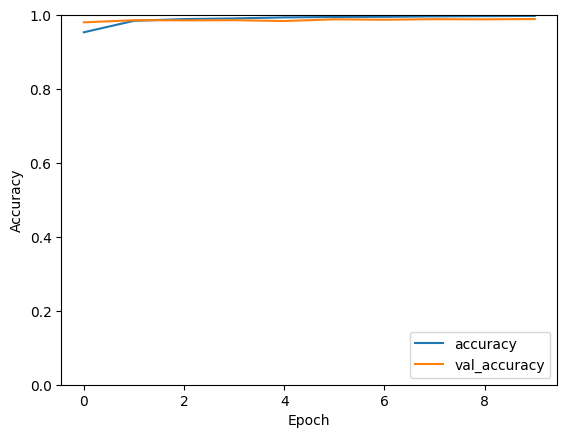

313/313 - 1s - loss: 0.0432 - accuracy: 0.9887 - 1s/epoch - 4ms/step
Test accuracy: 0.9886999726295471


In [2]:
# Nedenstående er lavet med chat gpt

# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

# Build the CNN model
model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape(target_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Plot the learning curve
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Save the model if desired
# model.save('mnist_cnn_model.h5')


REVISIONS||
:- | :- |
2021-10-20| CEF, initial version, clone from [HOML].
2021-10-26| CEF, added learning curve item.
2022-01-25| CEF, update to SWMAL F22.
2023-03-08| CEF, updated page no to HOML 3rd. ed., updated to SWMAL F23.
2023-03-15| CEF, removed wording "from scratch", replaced with "via the Keras API" and added comment about references.